<a href="https://colab.research.google.com/github/NourBesrour/AgeOfCrustaceansPredictions/blob/main/CNN_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries
In this section, we import all necessary libraries for our project. This includes libraries for data manipulation (`numpy`), image processing (`cv2`), model creation (`keras`, `tensorflow`), and data augmentation (`ImageDataGenerator`).


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Dense, Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cameraNum = 0
testRatio = 0.15
ValidationRation = 0.15
path ="/content/drive/MyDrive/num" # Updated for Colab
imgDim = (50, 50, 3)

images = []
classNo = []
myList = os.listdir(path)
print(path, "contient: ", myList)
nuOfClasses = len(myList)
print("importing Data....")
for x in range(0, nuOfClasses):
    myPicList = os.listdir(path + "/" + str(x))
    for j in myPicList:
        curImg = cv2.imread(path + "/" + str(x) + "/" + j)
        curImg = cv2.resize(curImg, (50, 50))
        images.append(curImg)
        classNo.append(x)
    print(x, end=".")
print("")
# print(len(images))
# print(len(classNo))
images = np.array(images)
classNo = np.array(classNo)
print(images.shape)
print(classNo.shape)

/content/drive/MyDrive/num contient:  ['9', '0', '5', '1', '6', '3', '8', '2', '7', '4']
importing Data....
0.1.2.3.4.5.6.7.8.9.
(11303, 50, 50, 3)
(11303,)


### Preprocessing and Data Splitting Explained

The process involves splitting the dataset into training, testing, and validation sets, followed by preprocessing each image to enhance the model's learning efficiency. Below, we outline the key steps in this process:

1. **Data Splitting**: The dataset is divided into distinct sets to ensure the model is trained, validated, and tested on different data samples.

   
   | Step                  | Description                              | Percentage |
   |-----------------------|------------------------------------------|------------|
   | Train-Test Split      | Initial split into training and test sets| 85% Train, 15% Test |
   | Train-Validation Split| Further split training set for validation| 85% Train, 15% Validation |

2. **Preprocessing Steps**: Each image undergoes a series of preprocessing steps to improve the model's learning capability.


   | Step            | Description                              | Effect |
   |-----------------|------------------------------------------|--------|
   | Grayscale Conversion | Convert images from BGR to grayscale  | Reduces complexity by focusing on structure rather than color |
   | Histogram Equalization | Enhance the contrast of the images  | Improves model's ability to recognize patterns in varying lighting conditions |
   | Normalization | Scale pixel values to a range of 0 to 1  | Helps in faster convergence during training |


3. **Reshaping for CNN**: The preprocessed images are reshaped to fit the input requirements of the Convolutional Neural Network (CNN).


   | Data          | Shape Before Reshape          | Shape After Reshape        |
   |---------------|-------------------------------|----------------------------|
   | `x_train`     | (num_samples, 50, 50)         | (num_samples, 50, 50, 1)   |
   | `x_test`      | (num_samples, 50, 50)         | (num_samples, 50, 50, 1)   |
   | `x_validation`| (num_samples, 50, 50)         | (num_samples, 50, 50, 1)   |


This structure ensures the input data is in the correct format for the CNN, with each image represented as a 50x50 pixel array with a single color channel (grayscale). The 1 in the shape `(num_samples, 50, 50, 1)` indicates the number of color channels. This preprocessing pipeline is crucial for training efficient and effective CNN models for tasks like image classification.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=ValidationRation)

def preprocess(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img / 255
    return img

x_train = np.array(list(map(preprocess, x_train)))
x_test = np.array(list(map(preprocess, x_test)))
x_validation = np.array(list(map(preprocess, x_validation)))

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[1], 1)
x_validation = x_validation.reshape(x_validation.shape[0], x_validation.shape[1], x_validation.shape[1], 1)


x train :  (8165, 50, 50, 1)
x test :   (1696, 50, 50, 1)
[855, 825, 827, 828, 824, 812, 812, 786, 808, 788]


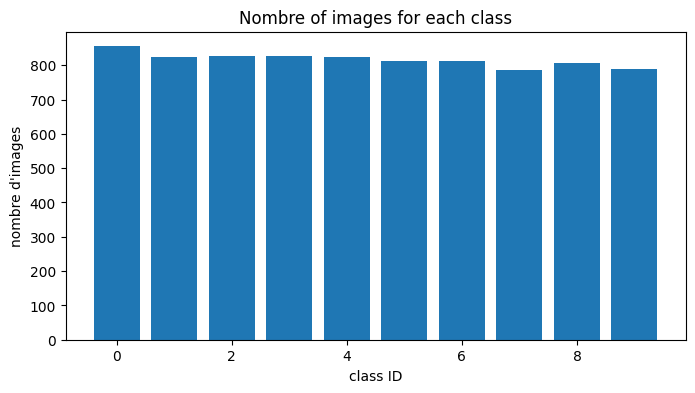

In [ ]:
print("x train : ", x_train.shape)
print("x test :  ", x_test.shape)
numOfSamples = []
for x in range(0, nuOfClasses):
    numOfSamples.append(len(np.where(y_train == x)[0]))
print(numOfSamples)

plt.figure(figsize=(8, 4))
plt.bar(range(0, nuOfClasses), numOfSamples)
plt.title("Nombre of images for each class")
plt.xlabel("class ID")
plt.ylabel("nombre d'images")
plt.show()


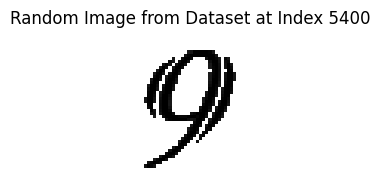

In [ ]:
random_index = np.random.randint(0, x_train.shape[0])

# Retrieve the image
random_image = x_train[random_index]

# Since the image is grayscale and stored with a channel dimension, we use squeeze() to remove single-dimensional entries
plt.figure(figsize=(2,2))
plt.imshow(random_image.squeeze(), cmap='gray')
plt.title(f"Random Image from Dataset at Index {random_index}")
plt.axis('off')  # Hide axes ticks
plt.show()

### Data Augmentation Explained

In this section, we utilize `ImageDataGenerator` from Keras for data augmentation, enhancing our model's ability to generalize by introducing a variety of transformations to the training images. Below is a summary of each transformation applied:

| Transformation       | Description                                           | Value  |
|----------------------|-------------------------------------------------------|--------|
| Width Shift Range    | Random horizontal shifts                              | 20%    |
| Height Shift Range   | Random vertical shifts                                | 15%    |
| Zoom Range           | Random zooming (inwards and outwards)                 | 20%    |
| Shear Range          | Skews the shape of the image                          | 15%    |
| Rotation Range       | Random rotations within a specified degree range      | 20°    |

These transformations introduce randomness in the training process, helping to simulate a variety of scenarios that the model might encounter in real-world applications, thereby reducing overfitting.

Additionally, we convert our labels into binary class matrices using `to_categorical`, essential for multi-class classification, ensuring each class from 0 to `len(myList)-1` is properly encoded.

**Note**: Data augmentation is applied solely to the training data to preserve the integrity of validation and test sets for accurate model evaluation.

In [ ]:
width_range = 0.2
height_range = 0.15
zoom_range = 0.20
shear_range = 0.15
rotation_range = 20

In [ ]:
dataGen = ImageDataGenerator(width_shift_range=width_range, height_shift_range=height_range, zoom_range=zoom_range, shear_range=shear_range, rotation_range=rotation_range)
dataGen.fit(x_train)

y_train = to_categorical(y_train, len(myList))
y_test = to_categorical(y_test, len(myList))
y_validation = to_categorical(y_validation, len(myList))


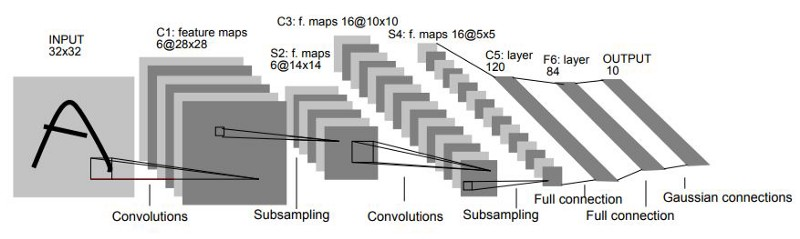


#lenet 5 CNN- Model architecture
##model arch : CNV --> CNV --> Pool --> CNV --> CNV --> Pool --> **Dropout** --> Dense --> Softmax

In [ ]:
noOfFilters = 60
sizeOfFilter1 = (5, 5)
sizeOfFilter2 = (3, 3)
sizeOfPool = (2, 2)
noOfNodes = 500

batchSize = 60
epochVal = 15

In [ ]:
def myModel():
    model = Sequential()
    model.add(Conv2D(noOfFilters, sizeOfFilter1, input_shape=(imgDim[0], imgDim[1], 1), activation='relu'))
    model.add(Conv2D(noOfFilters, sizeOfFilter1, activation='relu'))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add(Conv2D(noOfFilters//2, sizeOfFilter2, activation='relu'))
    model.add(Conv2D(noOfFilters//2, sizeOfFilter2, activation='relu'))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(noOfNodes, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(len(myList), activation='softmax'))
    model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = myModel()
print(model.summary())

history = model.fit(dataGen.flow(x_train, y_train, batch_size=batchSize), steps_per_epoch=len(x_train) // batchSize, epochs=epochVal, validation_data=(x_validation, y_validation), shuffle=1)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 46, 46, 60)        1560      
                                                                 
 conv2d_9 (Conv2D)           (None, 42, 42, 60)        90060     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 21, 21, 60)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 19, 19, 30)        16230     
                                                                 
 conv2d_11 (Conv2D)          (None, 17, 17, 30)        8130      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 30)          0         
 g2D)                                                 

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.show()
plt.show()
score = model.evaluate(x_test, y_test, verbose=0)
print("test Score = ", score[0])
print("test Acc = ", score[1])



In [ ]:
tf.saved_model.save(
    model, "/content/drive/MyDrive/CNNModel")